In [6]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg19 import VGG19
import matplotlib.pyplot as plt

In [10]:
train_directory = "./chest_xray/train/"
test_directory = "./chest_xray/test/"
validation_directory = "./chest_xray/val/"

In [4]:
train_data = ImageDataGenerator(rescale=1/255)
validation_data = ImageDataGenerator(rescale=1/255)
test_data = ImageDataGenerator(rescale=1/255)

In [13]:
train_generator = train_data.flow_from_directory(train_directory, target_size=(224,224), batch_size=8, class_mode="binary")
test_generator = test_data.flow_from_directory(test_directory, target_size=(224,224), class_mode="binary")
validation_generator = validation_data.flow_from_directory(validation_directory, target_size=(224,224), class_mode="binary")

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [14]:
# VGG19
model_vgg19 = VGG19(weights="imagenet", include_top=False, input_shape=(224,224,3))

In [15]:
for layer in model_vgg19.layers:
    layer.trainable = False

In [16]:
model_vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
#Criando um modelo com base na vgg 19
model = Sequential()
model.add(model_vgg19)
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [18]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])

In [25]:
history = model.fit(train_generator, epochs=1, validation_data=validation_generator)

Epoch 1/5
652/652 [==============================] - 452s 693ms/step - loss: 0.0445 - acc: 0.9839 - val_loss: 0.1036 - val_acc: 1.0000
Epoch 2/5
652/652 [==============================] - 453s 694ms/step - loss: 0.0332 - acc: 0.9866 - val_loss: 0.0152 - val_acc: 1.0000
Epoch 3/5
652/652 [==============================] - 444s 681ms/step - loss: 0.0278 - acc: 0.9891 - val_loss: 0.0236 - val_acc: 1.0000
Epoch 4/5
652/652 [==============================] - 446s 684ms/step - loss: 0.0244 - acc: 0.9912 - val_loss: 0.0455 - val_acc: 1.0000
Epoch 5/5
652/652 [==============================] - 449s 688ms/step - loss: 0.0261 - acc: 0.9916 - val_loss: 0.2696 - val_acc: 0.8750


In [55]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"{test_loss}, accuracia {test_accuracy}")

20/20 [==============================] - 47s 2s/step - loss: 1.5246 - acc: 0.7724
1.5245914459228516, accuracia 0.7724359035491943


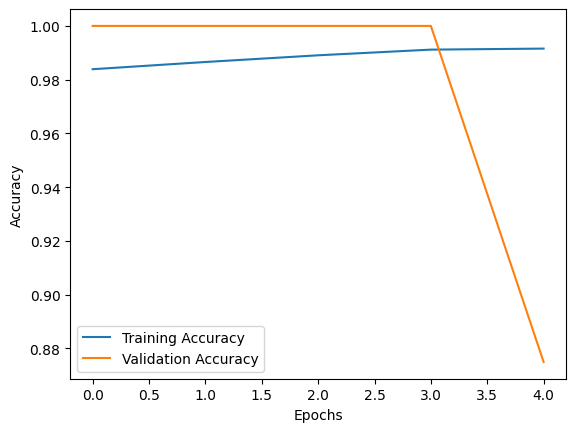

In [26]:
plt.plot(history.history["acc"], label="Training Accuracy")
plt.plot(history.history["val_acc"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()